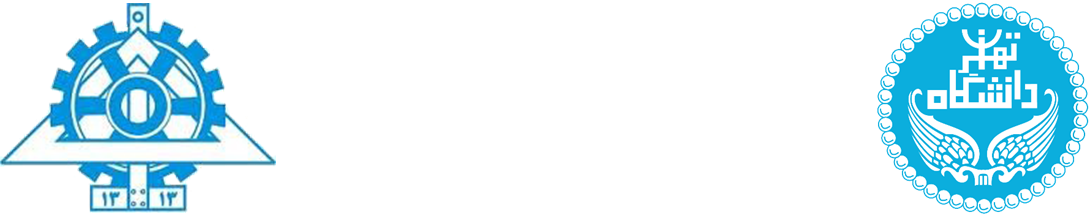

### AmirHossein Dabiri Aghdam - 810197502
#### Operation Research - Final Project
#### Optimal Vehicle Routing
Department of Electrical and Computer Engineering

University of Tehran

In [1]:
# Importing libraries
import csv
from pulp import *

In [3]:
def FindShortestPath(Dataset, Origin, Destination):

    # Validating inputs
    if (Origin >= len(Dataset) or Destination >= len(Dataset) or Origin < 0 or Destination < 0):
        return -1 # Invalud input

    if (Origin == Destination):
        # Printing desired outputs
        print("\nOrigin: index = %s, Latitude, Longtitude = %s" % (Dataset[Origin]['Place_index'], Dataset[Origin]['Lat, Long']))
        print("Destination: index = %s, Latitude, Longtitude = %s" % (Dataset[Destination]['Place_index'], Dataset[Destination]['Lat, Long']))
        print('\nOptimal Route with the total cost of 0: %d -> %d' %(Origin, Destination))
        return 1 # Solution found

    # Generating Weights matrix from Dataset
    W = [[0 for _ in range(len(Dataset))] for _ in range(len(Dataset))] 
    for node in Dataset:
        for neighbour, weight in zip(node['Neighbors_indice'].split(','), node['Neighbors_weight'].split(',')):
            W[int(node['Place_index'])][int(neighbour)] = int(weight)
    
    # Defining the Problem with Pulp
    problem = LpProblem('Optimal_Vehicle_Routing', LpMinimize)

    # Defining the variables
    x = [[0 for _ in range(len(Dataset))] for _ in range(len(Dataset))] 
    for i in range(len(W)):
        for j in range(len(W)):
            if (W[i][j] != 0): # Define xij only if wij != 0 
                x[i][j] = LpVariable(name="x%d,%d" % (i, j), cat="Binary")

    # Adding Constraints
    for node in Dataset:
        Place_index = int(node['Place_index'])
        if (Place_index == Origin):
            problem += (lpSum([x[Place_index][j] for j in range(len(x))]) == lpSum([x[j][Place_index] for j in range(len(x))]) + 1)
        elif (Place_index == Destination):
            problem += (lpSum([x[Place_index][j] for j in range(len(x))]) == lpSum([x[j][Place_index] for j in range(len(x))]) - 1)
        else:
            problem += (lpSum([x[Place_index][j] for j in range(len(x))]) == lpSum([x[j][Place_index] for j in range(len(x))]))

    # Defining cost function
    cost = 0
    for i in range(len(W)):
        for j in range(len(W)):
            if (W[i][j] != 0):
                cost += W[i][j] * x[i][j]
    problem += cost

    # Solving the problem
    problem.solve()
    if (LpStatus[problem.status] != 'Optimal'): 
        return -2 # Solution not found

    # Printing results and desired outputs
    print("\nOrigin: index = %s, Latitude, Longtitude = %s" % (Dataset[Origin]['Place_index'], Dataset[Origin]['Lat, Long']))
    print("Destination: index = %s, Latitude, Longtitude = %s" % (Dataset[Destination]['Place_index'], Dataset[Destination]['Lat, Long']))
    print('\nOptimal Route with the total cost of %d:' %(problem.objective.value()))
    node = Origin
    while(node != Destination):
        print('%d ->' %(node), end=' ')
        for j in range(len(x[node])):
            if (x[node][j] != 0 and x[node][j].value() == 1): 
                node = j
                break
    print(Destination)
    
    return 1 # Solution found

In [6]:
def PrintLocations(Dataset):
    print("Following locations are available:")
    for node in Dataset:
        print("index = %s, name = %s, coordinates = %s"%(node['Place_index'], node['Place_name'], node['Lat, Long']))

In [4]:
def RunMe():
    
    # Reading Dataset
    Dataset = list()
    with open("Dataset.csv", 'r') as file:
        csvreader = csv.reader(file)
        header = next(csvreader)
        for row in csvreader:
            entry = dict()
            for i in range(len(header)):
                entry[header[i]] = row[i]
            Dataset.append(entry)

    # Printing locations that are available in Dataset
    PrintLocations(Dataset)
    
    # Getting input from user
    Origin = int(input("\nPlease Enter index of your desired origin: "))
    Destination = int(input("Please Enter index your desired destination: "))
    
    # Finding the shortest path and printing it
    result = FindShortestPath(Dataset, Origin, Destination)
    
    # Handling invalid inputs & ...
    if (result == -1): print("Invalud input!")
    elif (result == -2): print("No Path found!")

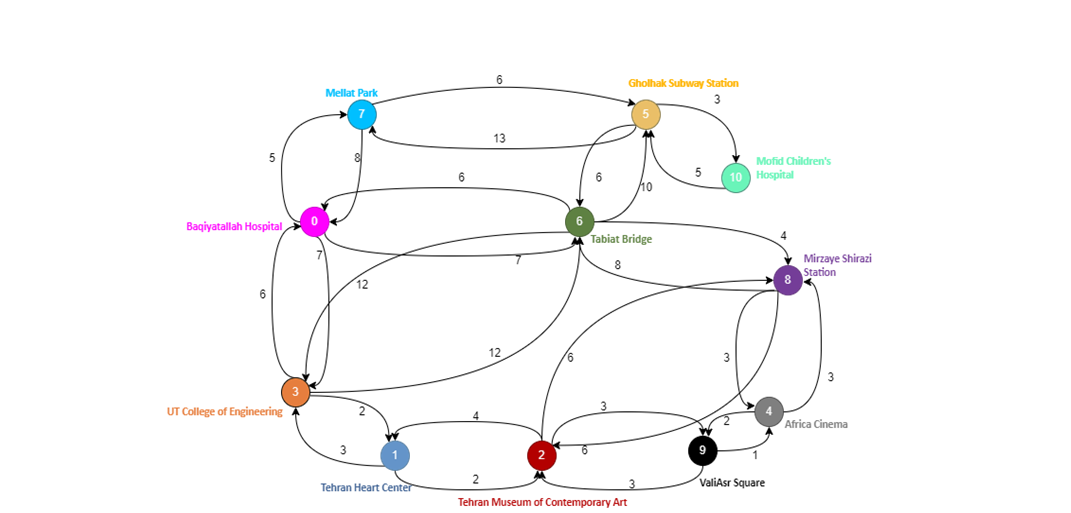

In [5]:
RunMe()

Following locations are available:
index = 0, name = Baqiyatallah Hospital, coordinates = 35.756, 51.395
index = 1, name = Tehran Heart Center, coordinates = 35.720, 51.389
index = 2, name = Tehran Museum of Contemporary Art, coordinates = 35.711, 51.391
index = 3, name = University of Tehran College of Engineering, coordinates = 35.724, 51.388
index = 4, name = Africa Cinema, coordinates = 35.716, 51.408
index = 5, name = Gholhak Subway Station, coordinates = 35.773, 51.438
index = 6, name = Tabiat Bridge, coordinates = 35.754, 51.420
index = 7, name = Mellat Park, coordinates = 35.778, 51.411
index = 8, name = Mirzaye Shirazi Station, coordinates = 35.728, 51.417
index = 9, name = ValiAsr Square, coordinates = 35.712, 51.407
index = 10, name = Mofid Children's Hospital, coordinates = 35.734, 51.329

Please Enter index of your desired origin: 3
Please Enter index your desired destination: 4

Origin: index = 3, Latitude, Longtitude = 35.724, 51.388
Destination: index = 4, Latitude, Lon